#  Predicting minimum daily temperatures in Melbourne
- Task 1: Predicting the minimum daily temperature of the 10th day, after seeing 9 days leading up.
- Task 2: Predicting the final yea

In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from utils import train_reg, plot_loss

In [130]:
PATH = "./data/Melbourne/daily-min-temperatures.txt"
with open(PATH, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    temps = np.array([temp for date, temp in reader], dtype="float32")
len(temps)

3650

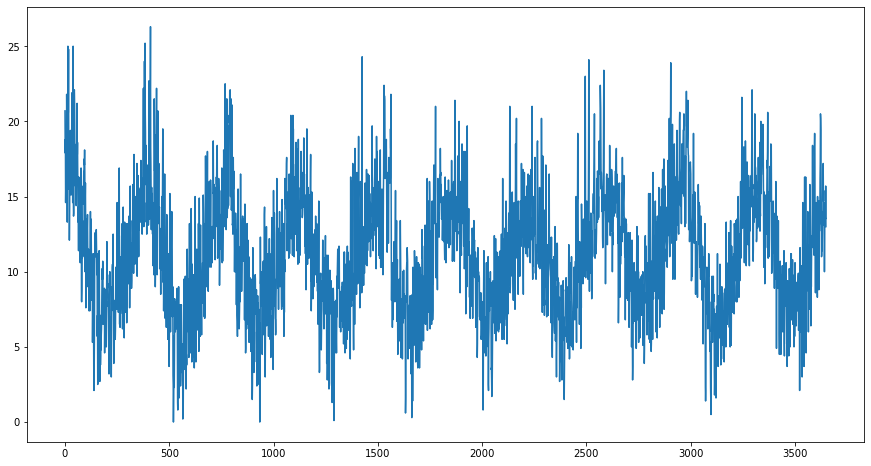

In [131]:
plt.figure(figsize=(15, 8))
plt.plot(temps)
plt.show()

In [132]:
mean_temp = temps.mean()
std_temp = temps.std()
temps = (temps - mean_temp) / std_temp
mean_temp, std_temp

(11.177753, 4.071279)

In [133]:
def split_data(X, train_perc=0.8):
    train_size = int(train_perc * len(X))
    train = X[:train_size]
    test = X[train_size:]
    return train, test   

In [134]:
train, test = split_data(temps)
train.shape, test.shape

((2920,), (730,))

In [135]:
def create_xy(X, size=10):
    blocks = len(X) // size
    x = np.zeros((blocks, size - 1), dtype="float32")
    start = 0
    for block in range(blocks):
        x[block] = X[start:start + size - 1]
        start += size
    y = X[size - 1::size].reshape(-1, 1)
    return torch.from_numpy(x), torch.from_numpy(y)

In [136]:
x_train, y_train = create_xy(train)
x_test, y_test =  create_xy(test)

In [137]:
train_gen = DataLoader(TensorDataset(x_train, y_train), batch_size=32, shuffle=True)
test_gen = DataLoader(TensorDataset(x_test, y_test), batch_size=32, shuffle=True)

In [234]:
net = nn.Sequential(nn.Linear(9, 9), nn.ReLU(), nn.Linear(9, 1))
opt = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.0001)
crit = nn.MSELoss()

In [235]:
train_loss, test_loss = train_reg(net, crit, opt, train_gen, test_gen, n_epochs=200)


Epoch:1, T Loss:0.959, V Loss:0.970



Epoch:2, T Loss:0.901, V Loss:0.749



Epoch:3, T Loss:0.858, V Loss:0.659



Epoch:4, T Loss:0.754, V Loss:0.586



Epoch:5, T Loss:0.691, V Loss:0.560



Epoch:6, T Loss:0.654, V Loss:0.454



Epoch:7, T Loss:0.608, V Loss:0.420



Epoch:8, T Loss:0.594, V Loss:0.379



Epoch:9, T Loss:0.611, V Loss:0.340



Epoch:10, T Loss:0.539, V Loss:0.376



Epoch:11, T Loss:0.541, V Loss:0.356



Epoch:12, T Loss:0.538, V Loss:0.411



Epoch:13, T Loss:0.517, V Loss:0.332



Epoch:14, T Loss:0.521, V Loss:0.379



Epoch:15, T Loss:0.529, V Loss:0.363



Epoch:16, T Loss:0.492, V Loss:0.279



Epoch:17, T Loss:0.595, V Loss:0.295



Epoch:18, T Loss:0.530, V Loss:0.309



Epoch:19, T Loss:0.591, V Loss:0.276



Epoch:20, T Loss:0.481, V Loss:0.335



Epoch:21, T Loss:0.507, V Loss:0.306



Epoch:22, T Loss:0.490, V Loss:0.319



Epoch:23, T Loss:0.524, V Loss:0.298



Epoch:24, T Loss:0.483, V Loss:0.318



Epoch:25, T Loss:0.489, V Loss:0.293



Epoch:26, T Loss:0.473, V Loss:0.264



Epoch:27, T Loss:0.481, V Loss:0.297



Epoch:28, T Loss:0.480, V Loss:0.304



Epoch:29, T Loss:0.496, V Loss:0.292



Epoch:30, T Loss:0.510, V Loss:0.281



Epoch:31, T Loss:0.525, V Loss:0.293



Epoch:32, T Loss:0.449, V Loss:0.341



Epoch:33, T Loss:0.440, V Loss:0.253



Epoch:34, T Loss:0.505, V Loss:0.267



Epoch:35, T Loss:0.497, V Loss:0.248



Epoch:36, T Loss:0.499, V Loss:0.293



Epoch:37, T Loss:0.456, V Loss:0.298



Epoch:38, T Loss:0.475, V Loss:0.260



Epoch:39, T Loss:0.451, V Loss:0.247



Epoch:40, T Loss:0.479, V Loss:0.299



Epoch:41, T Loss:0.483, V Loss:0.244



Epoch:42, T Loss:0.438, V Loss:0.241



Epoch:43, T Loss:0.432, V Loss:0.279



Epoch:44, T Loss:0.483, V Loss:0.321



Epoch:45, T Loss:0.424, V Loss:0.225



Epoch:46, T Loss:0.459, V Loss:0.275



Epoch:47, T Loss:0.411, V Loss:0.255



Epoch:48, T Loss:0.490, V Loss:0.339



Epoch:49, T Loss:0.425, V Loss:0.268



Epoch:50, T Loss:0.416, V Loss:0.267



Epoch:51, T Loss:0.447, V Loss:0.233



Epoch:52, T Loss:0.432, V Loss:0.269



Epoch:53, T Loss:0.450, V Loss:0.255



Epoch:54, T Loss:0.400, V Loss:0.241



Epoch:55, T Loss:0.462, V Loss:0.223



Epoch:56, T Loss:0.405, V Loss:0.224



Epoch:57, T Loss:0.412, V Loss:0.265



Epoch:58, T Loss:0.428, V Loss:0.266



Epoch:59, T Loss:0.394, V Loss:0.251



Epoch:60, T Loss:0.420, V Loss:0.275



Epoch:61, T Loss:0.448, V Loss:0.247



Epoch:62, T Loss:0.395, V Loss:0.269



Epoch:63, T Loss:0.432, V Loss:0.223



Epoch:64, T Loss:0.413, V Loss:0.228



Epoch:65, T Loss:0.396, V Loss:0.230



Epoch:66, T Loss:0.389, V Loss:0.253



Epoch:67, T Loss:0.388, V Loss:0.307



Epoch:68, T Loss:0.411, V Loss:0.279



Epoch:69, T Loss:0.396, V Loss:0.278



Epoch:70, T Loss:0.397, V Loss:0.262



Epoch:71, T Loss:0.436, V Loss:0.239



Epoch:72, T Loss:0.380, V Loss:0.232



Epoch:73, T Loss:0.391, V Loss:0.249



Epoch:74, T Loss:0.375, V Loss:0.281



Epoch:75, T Loss:0.379, V Loss:0.241



Epoch:76, T Loss:0.383, V Loss:0.226



Epoch:77, T Loss:0.418, V Loss:0.255



Epoch:78, T Loss:0.394, V Loss:0.263



Epoch:79, T Loss:0.374, V Loss:0.263



Epoch:80, T Loss:0.406, V Loss:0.233



Epoch:81, T Loss:0.377, V Loss:0.252



Epoch:82, T Loss:0.376, V Loss:0.230



Epoch:83, T Loss:0.382, V Loss:0.245



Epoch:84, T Loss:0.375, V Loss:0.305



Epoch:85, T Loss:0.387, V Loss:0.236



Epoch:86, T Loss:0.398, V Loss:0.275



Epoch:87, T Loss:0.387, V Loss:0.239



Epoch:88, T Loss:0.386, V Loss:0.260



Epoch:89, T Loss:0.363, V Loss:0.258



Epoch:90, T Loss:0.367, V Loss:0.304



Epoch:91, T Loss:0.427, V Loss:0.252



Epoch:92, T Loss:0.376, V Loss:0.225



Epoch:93, T Loss:0.372, V Loss:0.244



Epoch:94, T Loss:0.383, V Loss:0.230



Epoch:95, T Loss:0.395, V Loss:0.310



Epoch:96, T Loss:0.369, V Loss:0.259



Epoch:97, T Loss:0.449, V Loss:0.287



Epoch:98, T Loss:0.357, V Loss:0.238



Epoch:99, T Loss:0.367, V Loss:0.283



Epoch:100, T Loss:0.384, V Loss:0.239



Epoch:101, T Loss:0.384, V Loss:0.233



Epoch:102, T Loss:0.458, V Loss:0.211



Epoch:103, T Loss:0.356, V Loss:0.232



Epoch:104, T Loss:0.445, V Loss:0.247



Epoch:105, T Loss:0.356, V Loss:0.250



Epoch:106, T Loss:0.375, V Loss:0.218



Epoch:107, T Loss:0.360, V Loss:0.219



Epoch:108, T Loss:0.417, V Loss:0.240



Epoch:109, T Loss:0.388, V Loss:0.288



Epoch:110, T Loss:0.351, V Loss:0.231



Epoch:111, T Loss:0.373, V Loss:0.230



Epoch:112, T Loss:0.352, V Loss:0.246



Epoch:113, T Loss:0.375, V Loss:0.228



Epoch:114, T Loss:0.394, V Loss:0.227



Epoch:115, T Loss:0.396, V Loss:0.251



Epoch:116, T Loss:0.364, V Loss:0.229



Epoch:117, T Loss:0.368, V Loss:0.252



Epoch:118, T Loss:0.422, V Loss:0.228



Epoch:119, T Loss:0.355, V Loss:0.236



Epoch:120, T Loss:0.367, V Loss:0.270



Epoch:121, T Loss:0.431, V Loss:0.271



Epoch:122, T Loss:0.494, V Loss:0.286



Epoch:123, T Loss:0.412, V Loss:0.231



Epoch:124, T Loss:0.358, V Loss:0.300



Epoch:125, T Loss:0.382, V Loss:0.243



Epoch:126, T Loss:0.370, V Loss:0.243



Epoch:127, T Loss:0.355, V Loss:0.223



Epoch:128, T Loss:0.402, V Loss:0.240



Epoch:129, T Loss:0.364, V Loss:0.227



Epoch:130, T Loss:0.345, V Loss:0.288



Epoch:131, T Loss:0.355, V Loss:0.282



Epoch:132, T Loss:0.348, V Loss:0.275



Epoch:133, T Loss:0.364, V Loss:0.238



Epoch:134, T Loss:0.345, V Loss:0.247



Epoch:135, T Loss:0.373, V Loss:0.220



Epoch:136, T Loss:0.389, V Loss:0.233



Epoch:137, T Loss:0.340, V Loss:0.224



Epoch:138, T Loss:0.412, V Loss:0.220



Epoch:139, T Loss:0.362, V Loss:0.271



Epoch:140, T Loss:0.379, V Loss:0.229



Epoch:141, T Loss:0.359, V Loss:0.278



Epoch:142, T Loss:0.349, V Loss:0.229



Epoch:143, T Loss:0.383, V Loss:0.244



Epoch:144, T Loss:0.376, V Loss:0.291



Epoch:145, T Loss:0.386, V Loss:0.290



Epoch:146, T Loss:0.339, V Loss:0.280



Epoch:147, T Loss:0.361, V Loss:0.287



Epoch:148, T Loss:0.349, V Loss:0.284



Epoch:149, T Loss:0.381, V Loss:0.212



Epoch:150, T Loss:0.461, V Loss:0.207



Epoch:151, T Loss:0.356, V Loss:0.266



Epoch:152, T Loss:0.365, V Loss:0.248



Epoch:153, T Loss:0.346, V Loss:0.252



Epoch:154, T Loss:0.383, V Loss:0.229



Epoch:155, T Loss:0.340, V Loss:0.255



Epoch:156, T Loss:0.340, V Loss:0.217



Epoch:157, T Loss:0.420, V Loss:0.259



Epoch:158, T Loss:0.368, V Loss:0.251



Epoch:159, T Loss:0.349, V Loss:0.220



Epoch:160, T Loss:0.337, V Loss:0.248



Epoch:161, T Loss:0.378, V Loss:0.242



Epoch:162, T Loss:0.337, V Loss:0.230



Epoch:163, T Loss:0.375, V Loss:0.247



Epoch:164, T Loss:0.382, V Loss:0.221



Epoch:165, T Loss:0.359, V Loss:0.211



Epoch:166, T Loss:0.337, V Loss:0.262



Epoch:167, T Loss:0.343, V Loss:0.225



Epoch:168, T Loss:0.380, V Loss:0.213



Epoch:169, T Loss:0.339, V Loss:0.252



Epoch:170, T Loss:0.375, V Loss:0.238



Epoch:171, T Loss:0.347, V Loss:0.258



Epoch:172, T Loss:0.368, V Loss:0.284



Epoch:173, T Loss:0.336, V Loss:0.260



Epoch:174, T Loss:0.361, V Loss:0.234



Epoch:175, T Loss:0.345, V Loss:0.268



Epoch:176, T Loss:0.340, V Loss:0.218



Epoch:177, T Loss:0.397, V Loss:0.229



Epoch:178, T Loss:0.353, V Loss:0.258



Epoch:179, T Loss:0.356, V Loss:0.223



Epoch:180, T Loss:0.347, V Loss:0.237



Epoch:181, T Loss:0.357, V Loss:0.226



Epoch:182, T Loss:0.344, V Loss:0.271



Epoch:183, T Loss:0.400, V Loss:0.211



Epoch:184, T Loss:0.350, V Loss:0.213



Epoch:185, T Loss:0.336, V Loss:0.222



Epoch:186, T Loss:0.354, V Loss:0.219



Epoch:187, T Loss:0.363, V Loss:0.248



Epoch:188, T Loss:0.356, V Loss:0.297



Epoch:189, T Loss:0.345, V Loss:0.215



Epoch:190, T Loss:0.455, V Loss:0.299



Epoch:191, T Loss:0.347, V Loss:0.289



Epoch:192, T Loss:0.356, V Loss:0.275



Epoch:193, T Loss:0.381, V Loss:0.215



Epoch:194, T Loss:0.356, V Loss:0.265



Epoch:195, T Loss:0.418, V Loss:0.226



Epoch:196, T Loss:0.355, V Loss:0.296



Epoch:197, T Loss:0.346, V Loss:0.206



Epoch:198, T Loss:0.369, V Loss:0.231



Epoch:199, T Loss:0.419, V Loss:0.227



Epoch:200, T Loss:0.358, V Loss:0.260


In [245]:
def RMSE(true, preds):
    scaled_true = (true * std_temp) + mean_temp
    scaled_preds = (preds* std_temp) + mean_temp
    return (((scaled_true - scaled_preds)**2).mean()**0.5).item()

In [246]:
def predict_last(X):
    return X[:,-1]

In [247]:
net_preds = net(x_test)
last_preds = predict_last(x_test)

In [249]:
print(RMSE(y_test, preds), RMSE(y_test, last_preds))

2.0569772720336914 5.6345062255859375


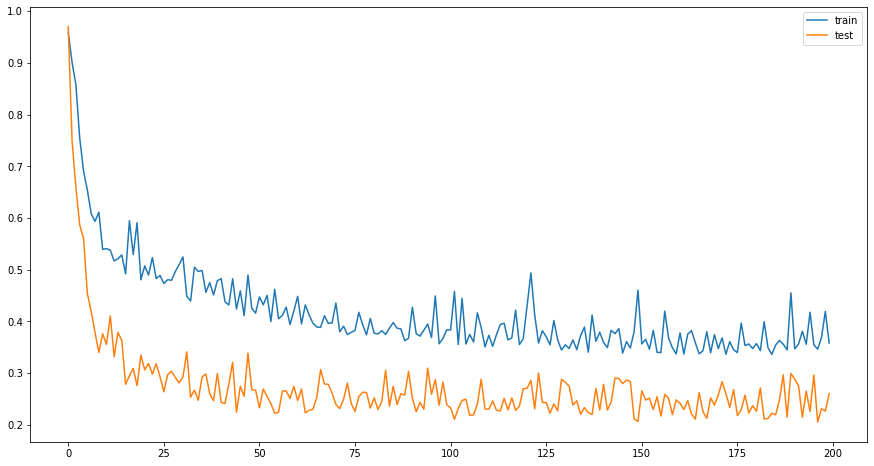

In [250]:
plot_loss(train_loss, test_loss)

In [252]:
scaled_preds = (net_preds* std_temp) + mean_temp
scaled_last = (last_preds* std_temp) + mean_temp
scaled_true = (y_test * std_temp) + mean_temp

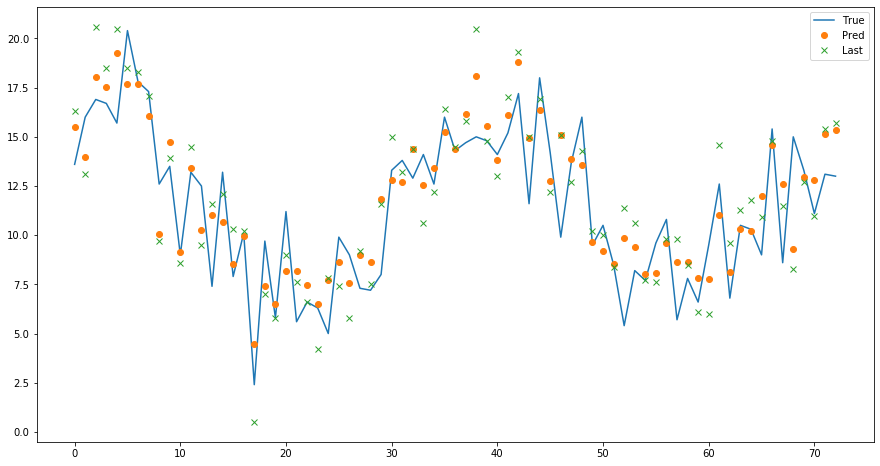

In [255]:
plt.figure(figsize=(15, 8))
plt.plot(scaled_true.detach().numpy(), label="True")
plt.plot(scaled_preds.detach().numpy(), "o", label="Pred")
plt.plot(scaled_last.detach().numpy(), "x", label="Last")
plt.legend()
plt.show()

In [195]:
class RNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=9):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, nonlinearity="tanh", batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        batch_size = x.shape[0]
        hidden = torch.zeros(1, batch_size, self.hidden_size)
        out, hidden = self.rnn(x.unsqueeze(-1), hidden)
        x = self.fc(out[:, -1, :])
        return x

In [204]:
rnn_net = RNN(1, 8)

In [205]:
opt_rnn = optim.Adam(rnn_net.parameters(), lr=0.001, weight_decay=0.0001)

In [206]:
train_loss, test_loss = train_reg(rnn_net, crit, opt, train_gen, test_gen, n_epochs=100)


Epoch:1, T Loss:0.967, V Loss:0.775



Epoch:2, T Loss:1.003, V Loss:0.914



Epoch:3, T Loss:0.992, V Loss:0.764



Epoch:4, T Loss:1.062, V Loss:0.817



Epoch:5, T Loss:1.107, V Loss:0.885



Epoch:6, T Loss:1.053, V Loss:0.790



Epoch:7, T Loss:1.013, V Loss:0.754



Epoch:8, T Loss:1.043, V Loss:0.754



Epoch:9, T Loss:0.917, V Loss:0.846



Epoch:10, T Loss:0.936, V Loss:0.796



Epoch:11, T Loss:0.973, V Loss:0.898



Epoch:12, T Loss:0.980, V Loss:0.794



Epoch:13, T Loss:0.981, V Loss:0.806



Epoch:14, T Loss:1.010, V Loss:0.690



Epoch:15, T Loss:0.925, V Loss:0.757



Epoch:16, T Loss:0.939, V Loss:0.783



Epoch:17, T Loss:0.962, V Loss:0.895



Epoch:18, T Loss:0.974, V Loss:0.686



Epoch:19, T Loss:0.975, V Loss:0.769



Epoch:20, T Loss:0.979, V Loss:0.911



Epoch:21, T Loss:0.978, V Loss:0.872



Epoch:22, T Loss:0.912, V Loss:0.865



Epoch:23, T Loss:0.944, V Loss:0.788



Epoch:24, T Loss:0.994, V Loss:0.816



Epoch:25, T Loss:0.948, V Loss:0.709



Epoch:26, T Loss:1.080, V Loss:0.857



Epoch:27, T Loss:1.146, V Loss:0.791



Epoch:28, T Loss:0.926, V Loss:0.755



Epoch:29, T Loss:0.970, V Loss:0.888



Epoch:30, T Loss:1.016, V Loss:0.753



Epoch:31, T Loss:0.945, V Loss:0.683



Epoch:32, T Loss:0.977, V Loss:0.889



Epoch:33, T Loss:1.011, V Loss:0.862



Epoch:34, T Loss:1.008, V Loss:0.752



Epoch:35, T Loss:0.916, V Loss:0.759



Epoch:36, T Loss:0.998, V Loss:0.732



Epoch:37, T Loss:0.987, V Loss:0.883



Epoch:38, T Loss:0.949, V Loss:0.668



Epoch:39, T Loss:0.911, V Loss:0.832



Epoch:40, T Loss:0.985, V Loss:0.892



Epoch:41, T Loss:1.012, V Loss:0.767



Epoch:42, T Loss:0.948, V Loss:0.756



Epoch:43, T Loss:0.918, V Loss:0.753



Epoch:44, T Loss:0.967, V Loss:0.821



Epoch:45, T Loss:0.922, V Loss:0.915



Epoch:46, T Loss:0.905, V Loss:0.775



Epoch:47, T Loss:1.006, V Loss:0.796



Epoch:48, T Loss:1.093, V Loss:0.798



Epoch:49, T Loss:0.984, V Loss:0.941



Epoch:50, T Loss:1.019, V Loss:0.933



Epoch:51, T Loss:0.922, V Loss:0.769



Epoch:52, T Loss:0.916, V Loss:0.804



Epoch:53, T Loss:0.995, V Loss:0.875



Epoch:54, T Loss:0.959, V Loss:0.774



Epoch:55, T Loss:0.976, V Loss:0.690



Epoch:56, T Loss:1.105, V Loss:0.808



Epoch:57, T Loss:1.077, V Loss:0.925



Epoch:58, T Loss:1.009, V Loss:0.777



Epoch:59, T Loss:1.050, V Loss:0.719



Epoch:60, T Loss:0.913, V Loss:0.784



Epoch:61, T Loss:1.009, V Loss:0.779



Epoch:62, T Loss:1.006, V Loss:0.853



Epoch:63, T Loss:1.201, V Loss:0.765



Epoch:64, T Loss:0.946, V Loss:0.853



Epoch:65, T Loss:0.914, V Loss:0.710



Epoch:66, T Loss:0.943, V Loss:0.771



Epoch:67, T Loss:0.959, V Loss:1.012



Epoch:68, T Loss:0.908, V Loss:0.772



Epoch:69, T Loss:0.973, V Loss:0.788



Epoch:70, T Loss:0.925, V Loss:0.797



Epoch:71, T Loss:0.948, V Loss:0.888



Epoch:72, T Loss:0.989, V Loss:0.706



Epoch:73, T Loss:1.021, V Loss:0.809



Epoch:74, T Loss:0.916, V Loss:0.738



Epoch:75, T Loss:1.001, V Loss:0.787



Epoch:76, T Loss:0.920, V Loss:0.904



Epoch:77, T Loss:0.961, V Loss:0.779



Epoch:78, T Loss:1.032, V Loss:0.857



Epoch:79, T Loss:0.934, V Loss:0.748



Epoch:80, T Loss:0.919, V Loss:0.782



Epoch:81, T Loss:0.994, V Loss:0.913



Epoch:82, T Loss:0.944, V Loss:0.889



Epoch:83, T Loss:0.990, V Loss:0.767



Epoch:84, T Loss:1.023, V Loss:0.747



Epoch:85, T Loss:1.068, V Loss:0.769



Epoch:86, T Loss:0.930, V Loss:0.762



Epoch:87, T Loss:0.977, V Loss:0.779



Epoch:88, T Loss:0.912, V Loss:0.678



Epoch:89, T Loss:0.980, V Loss:0.836



Epoch:90, T Loss:0.973, V Loss:0.769



Epoch:91, T Loss:1.112, V Loss:0.717



Epoch:92, T Loss:0.913, V Loss:0.802



Epoch:93, T Loss:0.954, V Loss:0.812



Epoch:94, T Loss:0.945, V Loss:0.720



Epoch:95, T Loss:1.010, V Loss:0.908



Epoch:96, T Loss:0.910, V Loss:0.764



Epoch:97, T Loss:0.923, V Loss:0.841



Epoch:98, T Loss:1.038, V Loss:0.772



Epoch:99, T Loss:0.963, V Loss:0.806



Epoch:100, T Loss:1.071, V Loss:0.714


In [207]:
preds = rnn_net(x_test)

In [208]:
RMSE(y_test, preds)

3.6463847160339355

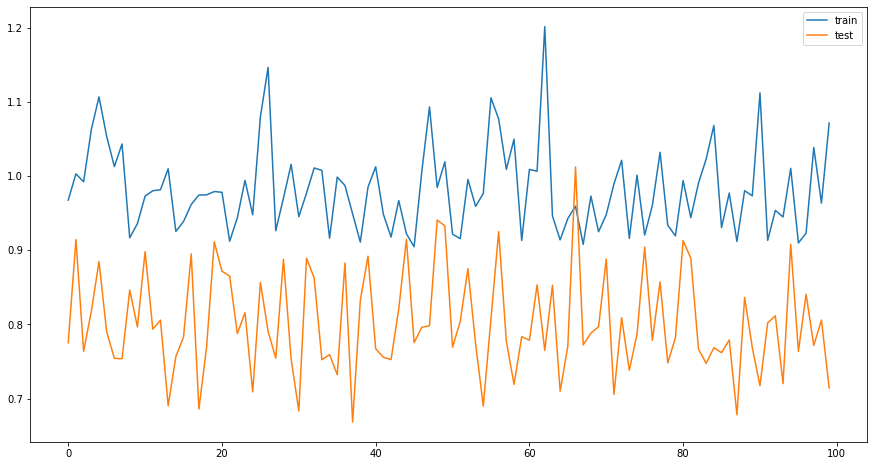

In [209]:
plot_loss(train_loss, test_loss)

In [210]:
scaled_preds = (preds* std_temp) + mean_temp
scaled_true = (y_test * std_temp) + mean_temp

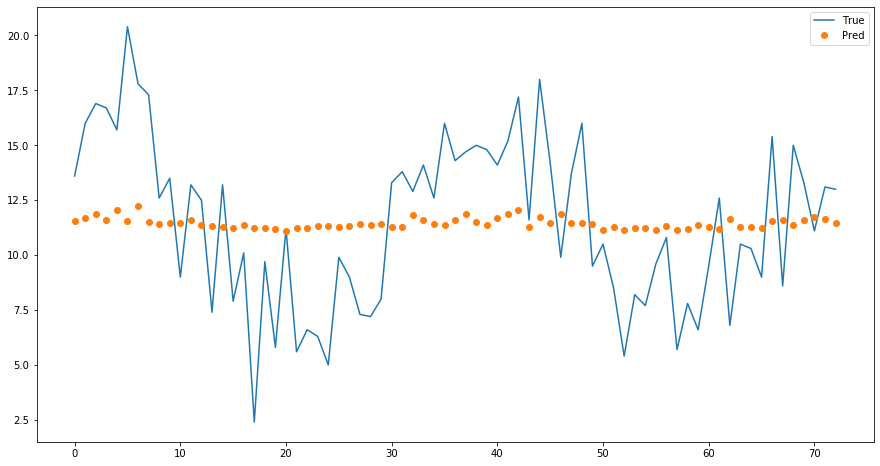

In [211]:
plt.figure(figsize=(15, 8))
plt.plot(scaled_true.detach().numpy(), label="True")
plt.plot(scaled_preds.detach().numpy(), "o", label="Pred")
plt.legend()
plt.show()